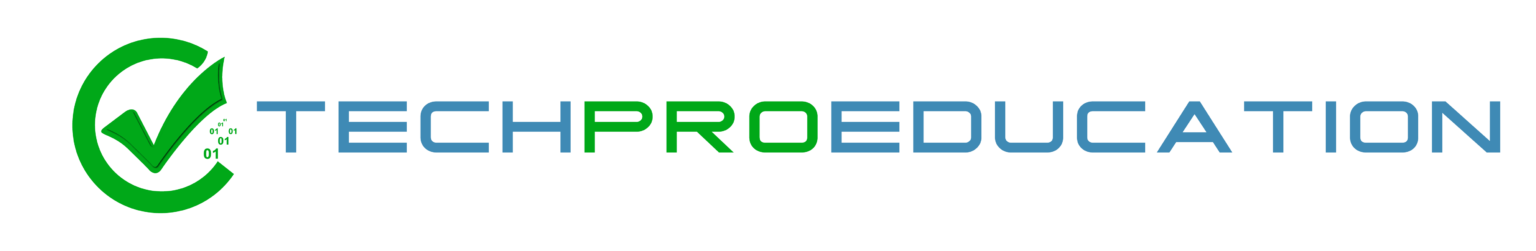

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df["income"] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [6]:
df.income.unique()

array([0, 1])

In [7]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df.workclass.replace("?", "Unknown", inplace=True)

In [9]:
df.occupation.replace("?", "Unknown", inplace=True)

In [10]:
df["native.country"].replace("?","Unknown", inplace=True)

In [11]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
df.workclass.value_counts(ascending=False)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
df.income.value_counts()#unbalance olabilir

income
0    24720
1     7841
Name: count, dtype: int64

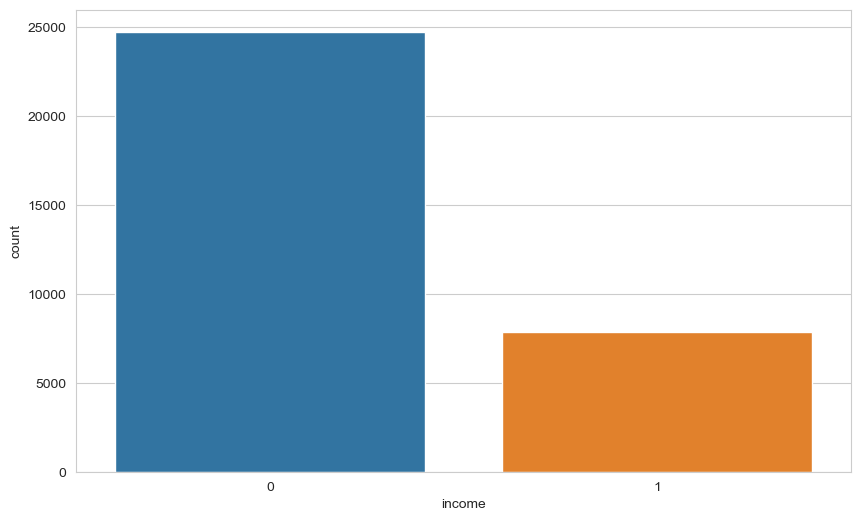

In [14]:
sns.countplot(data=df, x="income");

In [15]:
df.drop("education.num", axis= 1, inplace = True)

In [16]:
df.drop("marital.status", axis= 1, inplace = True)

In [17]:
df.drop("native.country", axis= 1, inplace = True)

In [18]:
df_numeric = df.select_dtypes(include="number")

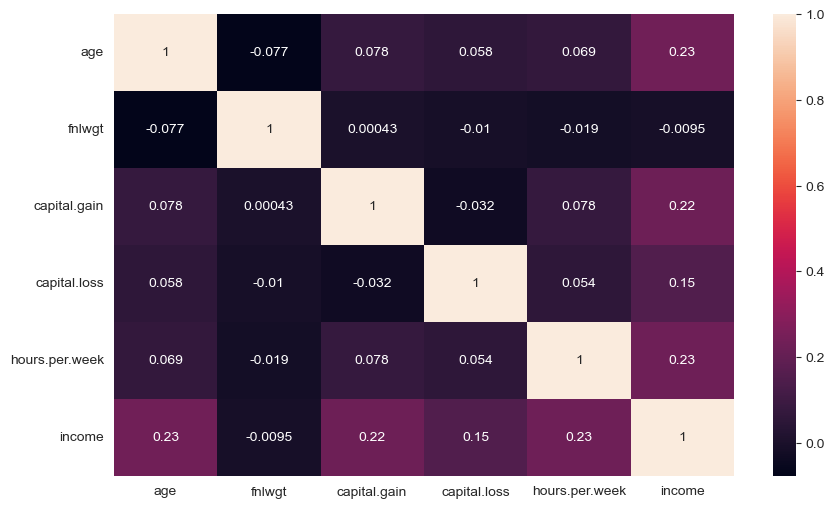

In [19]:
sns.heatmap(df_numeric.corr(), annot=True);

In [20]:
df_numeric.corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,income
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital.gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital.loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours.per.week,0.07,-0.02,0.08,0.05,1.00,0.23
income,0.23,-0.01,0.22,0.15,0.23,1.00


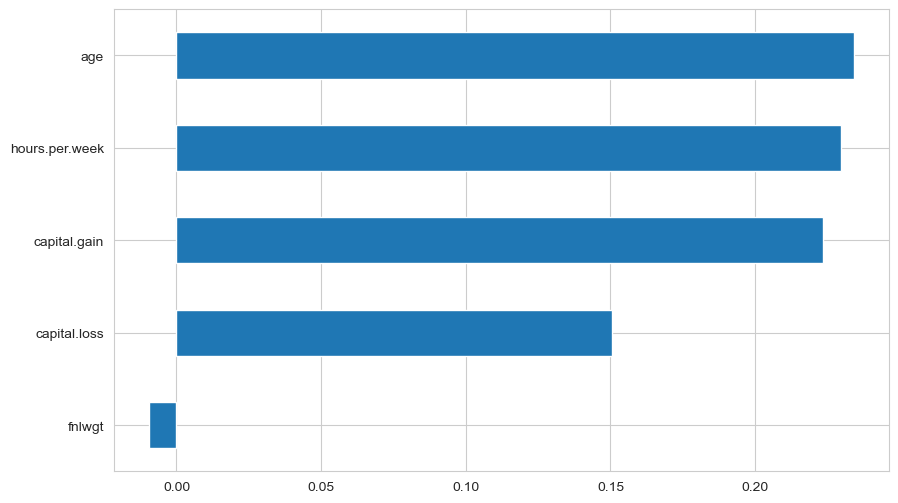

In [21]:
df_numeric.corr()["income"].drop("income").sort_values().plot.barh();

In [22]:
df.describe().T#capital.gain ve capital.loss featur larında outlier olabilir

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
capital.gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital.loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours.per.week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00
income,32561.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  income          32561 non-null  int32 
dtypes: int32(1), int64(5), object(6)
memory usage: 2.9+ MB


In [24]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Unknown,77053,HS-grad,Unknown,Not-in-family,White,Female,0,4356,40,0
1,82,Private,132870,HS-grad,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
2,66,Unknown,186061,Some-college,Unknown,Unmarried,Black,Female,0,4356,40,0
3,54,Private,140359,7th-8th,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,Some-college,Prof-specialty,Own-child,White,Female,0,3900,40,0


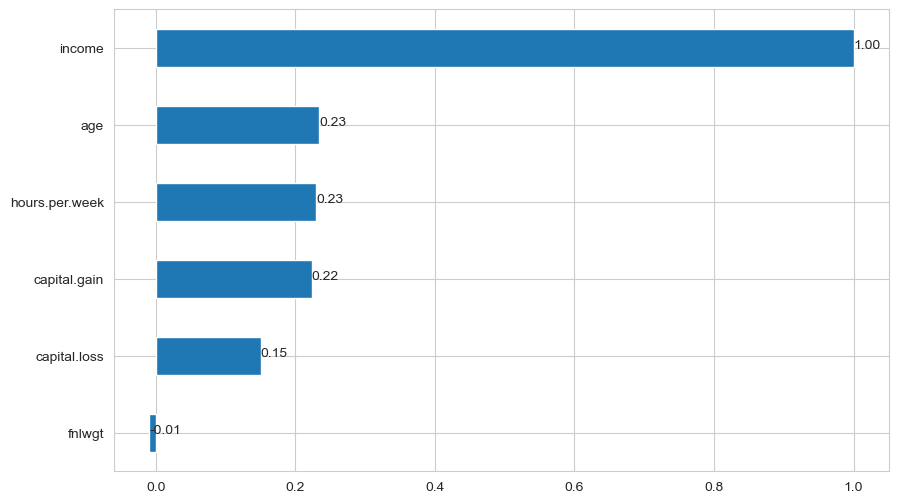

In [25]:
corr_values = df_numeric.corr()["income"].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

In [26]:
df.education=df.education.str.replace("Preschool", "0").str.replace("5th-6th","1").str.replace("1st-4th","1").str.replace("7th-8th","2")

In [27]:
df.education=df.education.str.replace("9th", "3").str.replace("10th","3").str.replace("11th","3").str.replace("12th","3")

In [28]:
df.education=df.education.str.replace("HS-grad", "3").str.replace("Some-college","3")

In [29]:
df.education=df.education.str.replace("Assoc-voc", "4").str.replace("Assoc-acdm","4")

In [30]:
df.education=df.education.str.replace("Bachelors", "5").str.replace("Prof-school","5").str.replace("Masters","6").str.replace("Doctorate","7")

In [31]:
df.relationship=df.relationship.replace(["Not-in-family", "Other-relative"], "Unmarried")

In [32]:
df.relationship=df.relationship.replace(["Husband", "Wife"], "Married")

In [33]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Unknown,77053,3,Unknown,Unmarried,White,Female,0,4356,40,0
1,82,Private,132870,3,Exec-managerial,Unmarried,White,Female,0,4356,18,0
2,66,Unknown,186061,3,Unknown,Unmarried,Black,Female,0,4356,40,0
3,54,Private,140359,2,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,3,Prof-specialty,Own-child,White,Female,0,3900,40,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  income          32561 non-null  int32 
dtypes: int32(1), int64(5), object(6)
memory usage: 2.9+ MB


In [35]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

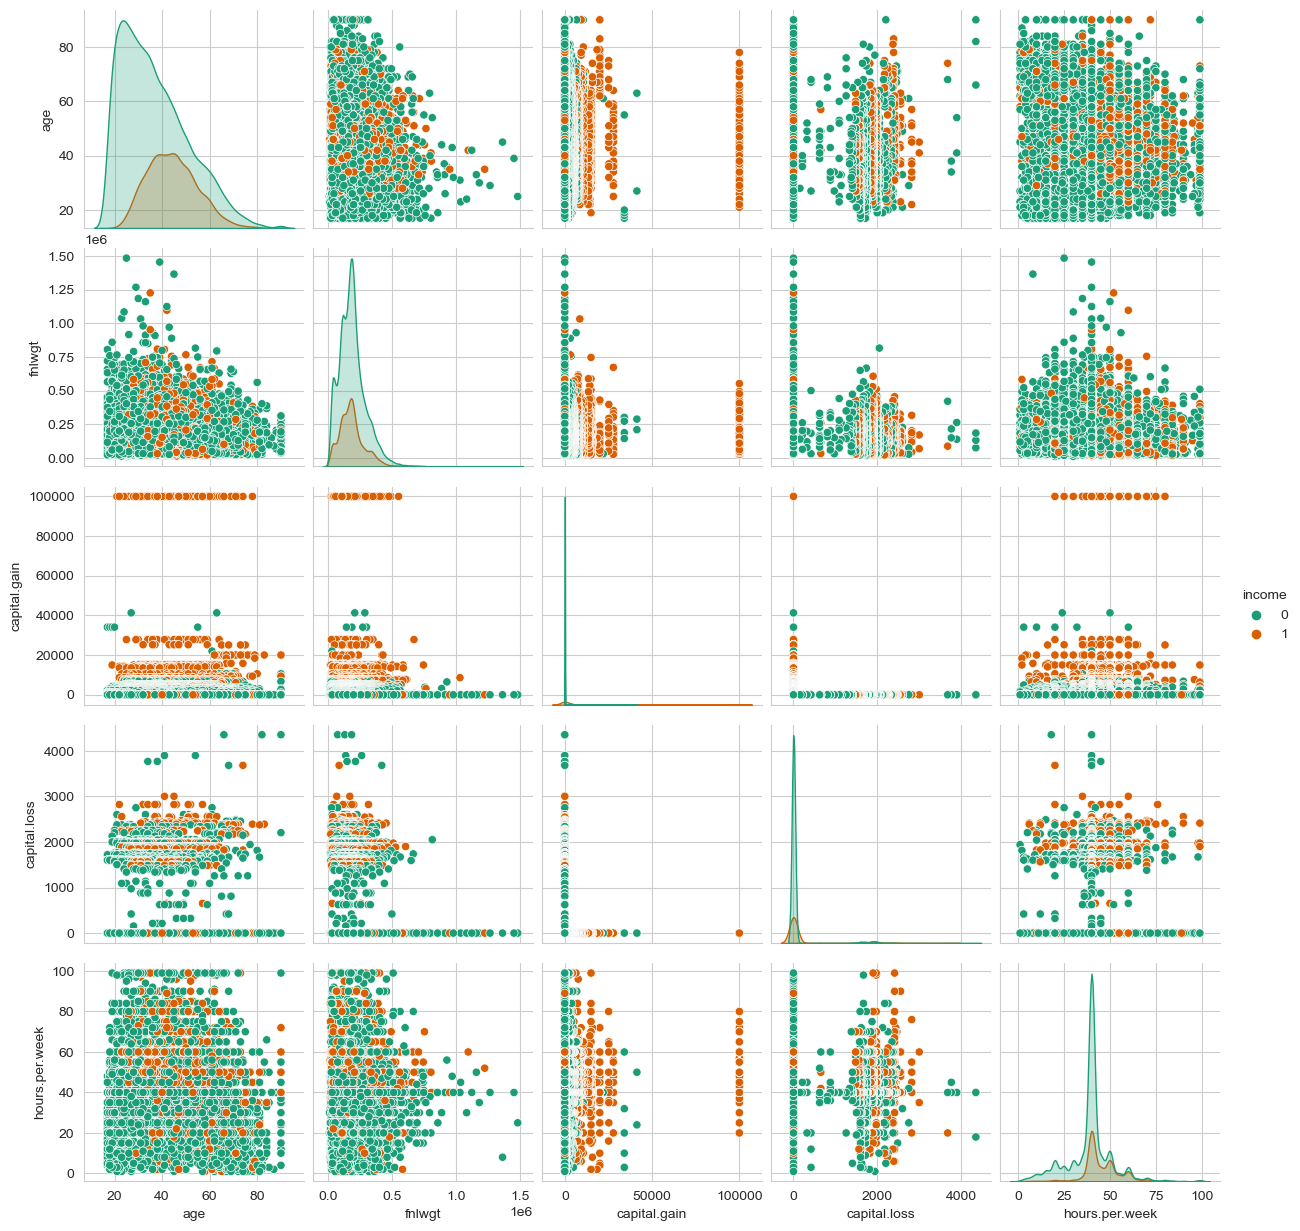

In [36]:
sns.pairplot(df, hue = "income", palette = "Dark2");

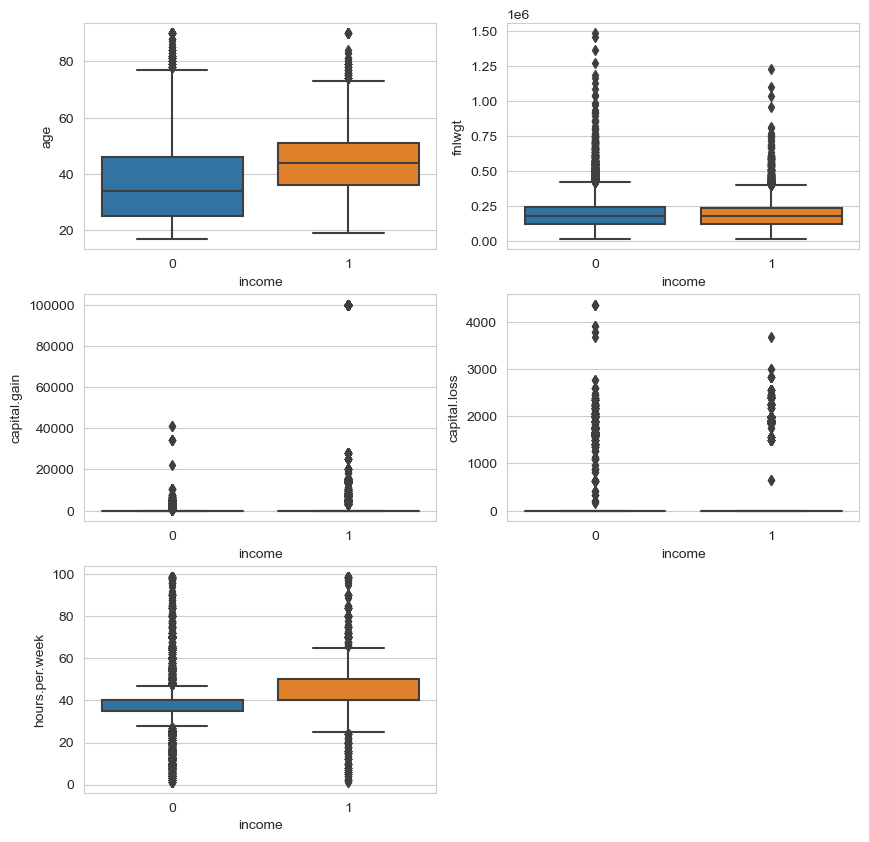

In [37]:
index = 0
plt.figure(figsize=(10,10))
for feature in df.select_dtypes("number"):
    if feature != "income":
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x='income',y=feature,data=df)

## Train | Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(columns="income")
y = df['income']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [41]:
cat = X_train.select_dtypes("object").columns
cat

Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')

In [42]:
X_train[cat]

,workclass,education,occupation,relationship,race,sex
4164,Private,3,Sales,Unmarried,White,Female
15480,Federal-gov,6,Adm-clerical,Married,White,Male
6913,State-gov,7,Prof-specialty,Married,White,Male
15245,Private,3,Sales,Own-child,Asian-Pac-Islander,Male
14906,Local-gov,5,Prof-specialty,Married,White,Female
...,...,...,...,...,...,...
10562,Private,3,Sales,Unmarried,White,Female
19837,Private,5,Sales,Married,White,Male
24508,Private,3,Machine-op-inspct,Unmarried,White,Female
20020,Private,3,Adm-clerical,Unmarried,White,Female


In [43]:
number = X_train.select_dtypes("number").columns
number

Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object')

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()

column_trans = make_column_transformer((ord_enc, cat), (scaler, number), remainder='passthrough')

In [45]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10
0,3.00,3.00,11.00,2.00,4.00,0.00,-1.51,-0.02,-0.00,-0.22,-0.85
1,0.00,6.00,0.00,0.00,4.00,1.00,-0.33,1.44,-0.15,-0.22,0.77
2,6.00,7.00,9.00,0.00,4.00,1.00,1.64,-0.61,-0.15,-0.22,-0.04
3,3.00,3.00,11.00,1.00,1.00,1.00,-1.14,-0.19,-0.15,-0.22,-1.25
4,1.00,5.00,9.00,0.00,4.00,0.00,-0.70,0.29,-0.15,-0.22,-1.25
...,...,...,...,...,...,...,...,...,...,...,...
26043,3.00,3.00,11.00,2.00,4.00,0.00,1.06,-1.51,-0.15,-0.22,-0.04
26044,3.00,5.00,11.00,0.00,4.00,1.00,-0.12,-0.36,-0.15,-0.22,0.36
26045,3.00,3.00,6.00,2.00,4.00,0.00,-0.33,1.44,-0.15,-0.22,-0.04
26046,3.00,3.00,0.00,2.00,4.00,0.00,0.10,-1.52,-0.15,-0.22,0.36


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
operations = [("OrdinalEncoder", column_trans), ("LG_model", LogisticRegression(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                ('LG_model', LogisticRegression(random_state=101))])

## Model Performance

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

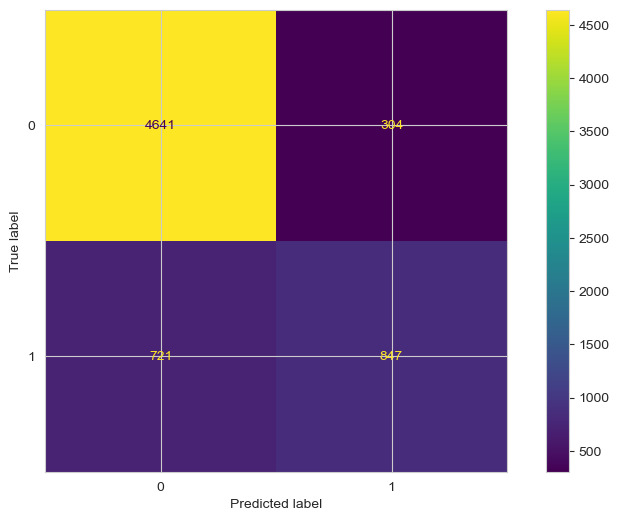

In [51]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

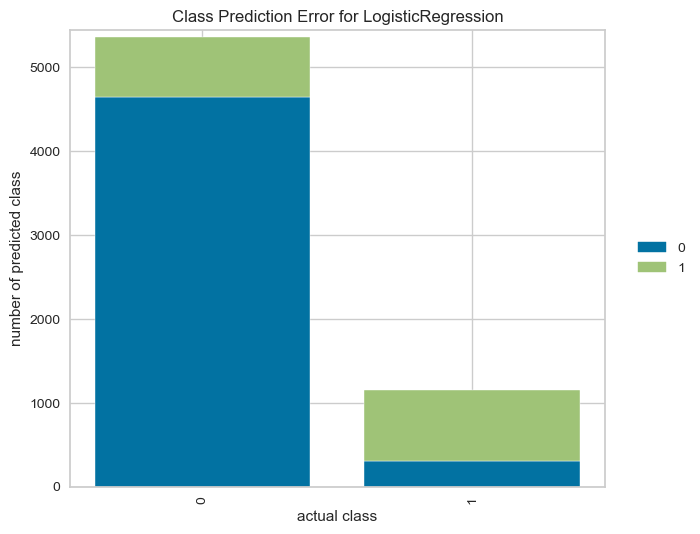

In [52]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [53]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[4641  304]
 [ 721  847]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4945
           1       0.74      0.54      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.80      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513


Train_Set
[[18534  1241]
 [ 2938  3335]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     19775
           1       0.73      0.53      0.61      6273

    accuracy                           0.84     26048
   macro avg       0.80      0.73      0.76     26048
weighted avg       0.83      0.84      0.83     26048



## Cross Validation (CV) & Evaluating ROC Curves and AUC

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [55]:
operations = [("OrdinalEncoder", column_trans), ("LG_model", LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
1,0.19,0.03,0.83,0.84,0.83,0.84,0.83,0.84,0.83,0.84
2,0.17,0.03,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84
3,0.19,0.02,0.85,0.84,0.85,0.84,0.85,0.84,0.85,0.84
4,0.18,0.02,0.83,0.84,0.83,0.84,0.83,0.84,0.83,0.84
5,0.22,0.02,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84
6,0.19,0.03,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84
7,0.17,0.03,0.83,0.84,0.83,0.84,0.83,0.84,0.83,0.84
8,0.19,0.03,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84
9,0.22,0.03,0.85,0.84,0.85,0.84,0.85,0.84,0.85,0.84
10,0.17,0.02,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84


In [56]:
df_scores.mean()[2:]

test_accuracy           0.84
train_accuracy          0.84
test_precision_micro    0.84
train_precision_micro   0.84
test_recall_micro       0.84
train_recall_micro      0.84
test_f1_micro           0.84
train_f1_micro          0.84
dtype: float64

## Gridsearh

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
operations = [("OrdinalEncoder", column_trans), ("LG_model", LogisticRegression(random_state=101))]

pipe_model = Pipeline(steps=operations)

# GridSearchCV için parametreler
parameters = {
    'LG_model__penalty': ['l1', 'l2'],  # Ceza türü
    'LG_model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Düzeltme parametresi
    'LG_model__solver': ["lbfgs", "liblinear", "sag", "saga"] ,
    'LG_model__class_weight': [None, 'balanced'] 
}

# GridSearchCV oluşturma
lg_grid_search = GridSearchCV(pipe_model, parameters, cv=5, n_jobs=-1)

In [59]:
lg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                                       ('LG_model',
                                        LogisticRegression(random_state=101))]),
             n_jobs=-1,
             param_grid={'LG_model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'LG_model__class_weight': [None, 'balanced'],
                         'LG_model__penalty': ['l1', 'l2'],
                         'LG_model__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']})

In [60]:
lg_grid_search.best_params_

{'LG_model__C': 0.01,
 'LG_model__class_weight': None,
 'LG_model__penalty': 'l1',
 'LG_model__solver': 'saga'}

In [61]:
eval_metric(lg_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[4662  283]
 [ 750  818]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4945
           1       0.74      0.52      0.61      1568

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.76      6513
weighted avg       0.83      0.84      0.83      6513


Train_Set
[[18637  1138]
 [ 3014  3259]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     19775
           1       0.74      0.52      0.61      6273

    accuracy                           0.84     26048
   macro avg       0.80      0.73      0.76     26048
weighted avg       0.83      0.84      0.83     26048



In [62]:
operations = [("OrdinalEncoder", column_trans), ("LG_model", 
                                                 LogisticRegression(class_weight=None, 
                                                 penalty= "l1", 
                                                 solver="saga", 
                                                 C=0.01, random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.32,0.03,0.83,0.84,0.73,0.74,0.48,0.52,0.58,0.61
2,0.26,0.03,0.84,0.84,0.72,0.74,0.52,0.52,0.61,0.61
3,0.29,0.03,0.85,0.84,0.75,0.74,0.57,0.51,0.64,0.61
4,0.27,0.03,0.83,0.84,0.72,0.74,0.48,0.52,0.57,0.61
5,0.28,0.02,0.84,0.84,0.76,0.74,0.51,0.52,0.61,0.61
6,0.28,0.03,0.84,0.84,0.74,0.74,0.54,0.52,0.62,0.61
7,0.28,0.03,0.83,0.84,0.72,0.74,0.50,0.52,0.59,0.61
8,0.28,0.03,0.84,0.84,0.74,0.74,0.54,0.52,0.62,0.61
9,0.30,0.02,0.85,0.84,0.77,0.74,0.53,0.51,0.62,0.61
10,0.28,0.02,0.84,0.84,0.76,0.74,0.52,0.51,0.62,0.61


In [63]:
df_scores.mean()[2:]

test_accuracy     0.84
train_accuracy    0.84
test_precision    0.74
train_precision   0.74
test_recall       0.52
train_recall      0.52
test_f1           0.61
train_f1          0.61
dtype: float64

# K-Nearest Neighbors (KNN) Classification

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [65]:
operations = [("OrdinalEncoder", column_trans), ("KNN_model", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                ('KNN_model', KNeighborsClassifier())])

In [66]:
operations = [("OrdinalEncoder", column_trans), ("KNN_model", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

# GridSearchCV için parametreler
parameters = {"KNN_model__n_neighbors": range(1, 30), "KNN_model__p":[1,2], "KNN_model__weights":["uniform", "distance"]}

# GridSearchCV oluşturma
knn_grid_search = GridSearchCV(pipe_model, parameters, cv=5, n_jobs=-1)

In [67]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                                       ('KNN_model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN_model__n_neighbors': range(1, 30),
                         'KNN_model__p': [1, 2],
                         'KNN_model__weights': ['uniform', 'distance']})

In [68]:
knn_grid_search.best_params_

{'KNN_model__n_neighbors': 29,
 'KNN_model__p': 1,
 'KNN_model__weights': 'uniform'}

In [69]:
eval_metric(knn_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[4586  359]
 [ 693  875]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4945
           1       0.71      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513


Train_Set
[[18527  1248]
 [ 2590  3683]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     19775
           1       0.75      0.59      0.66      6273

    accuracy                           0.85     26048
   macro avg       0.81      0.76      0.78     26048
weighted avg       0.85      0.85      0.85     26048



In [70]:
operations = [("OrdinalEncoder", column_trans), ("KNN_model", 
                                                 KNeighborsClassifier(
                                                     n_neighbors= 29,
                                                     p= 1,
                                                     weights= 'uniform'))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.19,1.25,0.83,0.85,0.70,0.75,0.53,0.59,0.60,0.66
2,0.17,1.22,0.84,0.85,0.70,0.75,0.56,0.59,0.62,0.66
3,0.17,1.25,0.85,0.85,0.72,0.75,0.59,0.59,0.65,0.66
4,0.17,1.25,0.84,0.85,0.73,0.75,0.54,0.59,0.62,0.66
5,0.19,1.21,0.85,0.85,0.73,0.74,0.57,0.58,0.64,0.65
6,0.19,1.25,0.84,0.85,0.71,0.75,0.57,0.59,0.63,0.66
7,0.19,1.27,0.84,0.85,0.73,0.74,0.55,0.58,0.63,0.65
8,0.20,1.22,0.84,0.85,0.73,0.75,0.55,0.59,0.63,0.66
9,0.17,1.25,0.85,0.85,0.74,0.75,0.59,0.58,0.65,0.65
10,0.19,1.22,0.85,0.85,0.75,0.75,0.57,0.58,0.65,0.66


In [71]:
df_scores.mean()[2:]

test_accuracy     0.84
train_accuracy    0.85
test_precision    0.72
train_precision   0.75
test_recall       0.56
train_recall      0.59
test_f1           0.63
train_f1          0.66
dtype: float64

# Support Vector Classifier

In [72]:
from sklearn.svm import SVC

In [73]:
operations = [("OrdinalEncoder", column_trans), ("SVC_model", SVC())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                ('SVC_model', SVC())])

In [74]:
operations = [("OrdinalEncoder", column_trans), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

# GridSearchCV için parametreler
parameters = {"SVC__C": [0.001, 0.1],
             "SVC__gamma":["scale", "auto", 0.2],
             "SVC__kernel":["rbf", "linear"]}
# GridSearchCV oluşturma
svc_grid_search = GridSearchCV(pipe_model, parameters, cv=5, n_jobs=-1)

In [75]:
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2],
                         'SVC__kernel': ['rbf', 'linear']})

In [76]:
svc_grid_search.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}

In [77]:
svc_grid_search.best_index_

7

In [78]:
svc_grid_search.best_score_

0.842291184348365

In [79]:
eval_metric(svc_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[4674  271]
 [ 725  843]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      4945
           1       0.76      0.54      0.63      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.74      0.77      6513
weighted avg       0.84      0.85      0.84      6513


Train_Set
[[18650  1125]
 [ 2975  3298]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     19775
           1       0.75      0.53      0.62      6273

    accuracy                           0.84     26048
   macro avg       0.80      0.73      0.76     26048
weighted avg       0.83      0.84      0.83     26048



In [80]:
operations = [("OrdinalEncoder", column_trans), ("SVC", 
                                                 SVC(
                                                     C= 0.1, gamma = 'scale', kernel= 'linear'))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,16.59,1.14,0.84,0.84,0.74,0.74,0.51,0.53,0.60,0.62
2,17.08,1.12,0.84,0.84,0.73,0.75,0.53,0.53,0.61,0.62
3,16.87,1.14,0.85,0.84,0.75,0.74,0.56,0.52,0.64,0.61
4,16.83,1.14,0.83,0.84,0.73,0.75,0.49,0.52,0.59,0.62
5,16.91,1.14,0.85,0.84,0.77,0.74,0.53,0.52,0.63,0.61
6,16.63,1.14,0.84,0.84,0.74,0.75,0.53,0.53,0.62,0.62
7,16.97,1.14,0.83,0.84,0.72,0.75,0.49,0.53,0.58,0.62
8,17.17,1.13,0.85,0.84,0.75,0.74,0.54,0.52,0.63,0.61
9,17.02,1.14,0.85,0.84,0.77,0.75,0.53,0.52,0.62,0.61
10,17.25,1.12,0.84,0.84,0.75,0.75,0.52,0.52,0.62,0.61


In [81]:
df_scores.mean()[2:]

test_accuracy     0.84
train_accuracy    0.84
test_precision    0.75
train_precision   0.75
test_recall       0.52
train_recall      0.52
test_f1           0.61
train_f1          0.62
dtype: float64

En iyi skorlar LogisticRegresyon da geldi. SVM çok aşırı yavaştı. Veriseti dengesiz olduğu için presicion a bakıyorum ve LogistikRegression da daha yüksek bu yüzden final model olarak LogisticRegression u seçiyorum.

# Final Model & Prediction

In [83]:
X = df.drop(columns=["income"])
y = df['income']

In [84]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
operations = [("OrdinalEncoder", column_trans), ("LG_model", 
                                                 LogisticRegression(class_weight=None, 
                                                 penalty= "l1", 
                                                 solver="saga", 
                                                 C=0.01, random_state=101))]


pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)
# bulduğumuz en iyi hyper parametreler ile tüm data için modeli yeniden kuruyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object'))])),
                ('LG_model',
                 LogisticRegression(C=0.01, penalty='l1', random_state=101,
                                    solver='saga'))])

In [86]:
pd.DataFrame(column_trans.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,10
0,7.00,3.00,14.00,2.00,4.00,0.00,3.77,-1.07,-0.15,10.59,-0.04
1,3.00,3.00,3.00,2.00,4.00,0.00,3.18,-0.54,-0.15,10.59,-1.82
2,7.00,3.00,14.00,2.00,2.00,0.00,2.01,-0.04,-0.15,10.59,-0.04
3,3.00,2.00,6.00,2.00,4.00,0.00,1.13,-0.47,-0.15,9.46,-0.04
4,3.00,3.00,9.00,1.00,4.00,0.00,0.18,0.71,-0.15,9.46,-0.04
...,...,...,...,...,...,...,...,...,...,...,...
32556,3.00,3.00,10.00,2.00,4.00,1.00,-1.22,1.14,-0.15,-0.22,-0.04
32557,3.00,4.00,12.00,0.00,4.00,0.00,-0.85,0.64,-0.15,-0.22,-0.20
32558,3.00,3.00,6.00,0.00,4.00,1.00,0.10,-0.34,-0.15,-0.22,-0.04
32559,3.00,3.00,0.00,2.00,4.00,0.00,1.42,-0.36,-0.15,-0.22,-0.04


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
capital.gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital.loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours.per.week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00
income,32561.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00


In [85]:
X.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,90,Unknown,77053,3,Unknown,Unmarried,White,Female,0,4356,40
1,82,Private,132870,3,Exec-managerial,Unmarried,White,Female,0,4356,18
2,66,Unknown,186061,3,Unknown,Unmarried,Black,Female,0,4356,40
3,54,Private,140359,2,Machine-op-inspct,Unmarried,White,Female,0,3900,40
4,41,Private,264663,3,Prof-specialty,Own-child,White,Female,0,3900,40


In [95]:
samples = {"age": [19,36],
           "workclass":["Private","Unknown"],
           "fnlwgt":[132878,140000],
           "education" : ["3", "6"],
           "occupation": ["Exec-managerial", "Prof-specialty"],
           "relationship" : ["Unmarried","Married"],
           "race" : ["White", "Black"],
           "sex":["Male","Female"],
           'capital.gain':[0, 10],
           
           'capital.loss': [4325,3900],
           "hours.per.week" : [40, 18]
           }

In [96]:
df_samples = pd.DataFrame(samples)
df_samples

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,19,Private,132878,3,Exec-managerial,Unmarried,White,Male,0,4325,40
1,36,Unknown,140000,6,Prof-specialty,Married,Black,Female,10,3900,18


In [97]:
X.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,90,Unknown,77053,3,Unknown,Unmarried,White,Female,0,4356,40
1,82,Private,132870,3,Exec-managerial,Unmarried,White,Female,0,4356,18
2,66,Unknown,186061,3,Unknown,Unmarried,Black,Female,0,4356,40
3,54,Private,140359,2,Machine-op-inspct,Unmarried,White,Female,0,3900,40
4,41,Private,264663,3,Prof-specialty,Own-child,White,Female,0,3900,40


In [98]:
pd.DataFrame(column_trans.transform(df_samples))

,0,1,2,3,4,5,6,7,8,9,10
0,3.00,3.00,3.00,2.00,4.00,1.00,-1.44,-0.54,-0.15,10.52,-0.04
1,7.00,6.00,9.00,0.00,2.00,0.00,-0.19,-0.47,-0.14,9.46,-1.82


In [99]:
pipe_final_model.predict(df_samples)

array([0, 1])